In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

In [2]:
# Import data from npy-file

ps_shakB_RNAi_osci = np.load('shakB_RNAi_ps_osci.npy')
ps_Ctrl_shakB_RNAi = np.load('shakB_RNAi_Control_ps_osci.npy')
ps_shakB2_osci = np.load('shakB2_ps_osci.npy')
ps_Ctrl_shakB2 = np.load('shakB2_Control_ps_osci.npy')
shakB_RNAi_tubG80 = np.load('tubGal80ts_shakB_RNAi_ps_osci.npy')
ps_shakB2_GC6f_ALL_osci = np.load('shakB2_GC6f_ALL_ps_osci.npy')

In [3]:
ps_Ctrl_shakB_RNAi.shape

(2250L, 35L)

In [4]:
ps_shakB_RNAi_osci_mean = np.mean(ps_shakB_RNAi_osci, axis=1)
ps_Ctrl_shakB_RNAi_mean = np.mean(ps_Ctrl_shakB_RNAi, axis=1)
ps_shakB2_osci_mean = np.mean(ps_shakB2_osci, axis=1)
ps_Ctrl_shakB2_mean = np.mean(ps_Ctrl_shakB2, axis=1)
shakB_RNAi_tubG80_mean = np.mean(shakB_RNAi_tubG80, axis=1)
ps_shakB2_GC6f_ALL_mean = np.mean(ps_shakB2_GC6f_ALL_osci, axis=1)

fs = 3.75600961538462
freqs = np.fft.fftfreq(len(ps_shakB_RNAi_osci_mean), 1/fs)
idx = np.argsort(freqs)

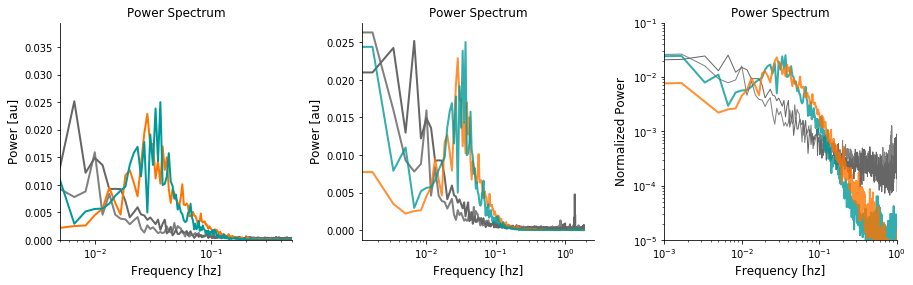

In [5]:
fig = plt.figure(figsize = (15,4))
plt.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(131)
plt.xscale('log')
plt.xlim([0.005,0.5])
plt.ylim([0,np.max(ps_Ctrl_shakB_RNAi_mean)*1.5])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], ps_Ctrl_shakB_RNAi_mean[idx], color='0.5', linewidth='2')
plt.plot(freqs[idx], ps_Ctrl_shakB2_mean[idx], color='0.4', linewidth='2')
plt.plot(freqs[idx], ps_shakB_RNAi_osci_mean[idx], color='#FF7400', linewidth='2')
plt.plot(freqs[idx], ps_shakB2_osci_mean[idx], color='#009999', linewidth='2')
ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=12)
ax.set_ylabel('Power [au]', size=12)

ax = fig.add_subplot(132)
plt.xscale('log')
#plt.xlim([1,100])
#plt.ylim([0,0.0008])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], ps_Ctrl_shakB_RNAi_mean[idx], color='0.5', linewidth='2')
plt.plot(freqs[idx], ps_Ctrl_shakB2_mean[idx], color='0.4', linewidth='2')
plt.plot(freqs[idx], ps_shakB_RNAi_osci_mean[idx], color='#FF7400', linewidth='2', alpha=0.8)
plt.plot(freqs[idx], ps_shakB2_osci_mean[idx], color='#009999', linewidth='2', alpha=0.8)
ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=12)
ax.set_ylabel('Power [au]', size=12)

ax = fig.add_subplot(133)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,1])
plt.ylim([0.00001,0.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], ps_Ctrl_shakB_RNAi_mean[idx], color='0.5', linewidth='1')
plt.plot(freqs[idx], ps_Ctrl_shakB2_mean[idx], color='0.4', linewidth='1')
plt.plot(freqs[idx], ps_shakB2_osci_mean[idx], color='#009999', linewidth='2', alpha=0.8)
plt.plot(freqs[idx], ps_shakB_RNAi_osci_mean[idx], color='#FF7400', linewidth='2', alpha=0.8)
ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=12)
ax.set_ylabel('Normalized Power', size=12)
plt.show()

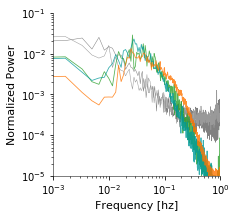

In [18]:
# Plot Power Spectrum

fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)

plt.plot(freqs[idx], ps_Ctrl_shakB2_mean[idx], color='0.5', linewidth='0.5')
plt.plot(freqs[idx], ps_Ctrl_shakB_RNAi_mean[idx], color='0.6', linewidth='0.5')
plt.plot(freqs[idx], shakB_RNAi_tubG80_mean[idx], color='C2', linewidth='0.8', alpha=0.8)
#plt.plot(freqs[idx], ps_shakB2_osci_mean[idx], color='#009999', linewidth='1.5', alpha=0.8)
plt.plot(freqs[idx], ps_shakB_RNAi_osci_mean[idx], color='#009999', linewidth='0.8', alpha=0.8)
plt.plot(freqs[idx], ps_shakB2_GC6f_ALL_mean[idx], color='#FF7400', linewidth='0.8', alpha=0.8)

plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,1])
plt.ylim([0.00001,0.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)

#ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=11)
ax.set_ylabel('Normalized Power', size=11)

plt.savefig('Power_Spectrum_Imaging_all.pdf',bbox_inches='tight', format='pdf')
plt.show()

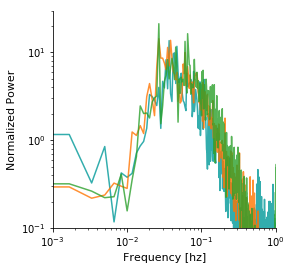

In [7]:
ps_b2ctrl = ps_shakB2_osci_mean / ps_Ctrl_shakB2_mean
ps_RNAictrl = ps_shakB_RNAi_osci_mean / ps_Ctrl_shakB_RNAi_mean
ps_RNAitubCtrl = shakB_RNAi_tubG80_mean / ps_Ctrl_shakB_RNAi_mean
# PLOT differential power spectra

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,1])
plt.ylim([0.1,30])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], ps_b2ctrl[idx], color='#009999', linewidth='1.5', alpha=0.8)
plt.plot(freqs[idx], ps_RNAictrl[idx], color='#FF7400', linewidth='1.5', alpha=0.8)
plt.plot(freqs[idx], ps_RNAitubCtrl[idx], color='C2', linewidth='1.5', alpha=0.8)
#ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=11)
ax.set_ylabel('Normalized Power', size=11)
plt.show()

In [8]:
# Calculate Beta Power (10-30Hz) and ultra slow wave power (0.02-0.2)

a = freqs[idx]
b = ps_shakB2_osci[idx,:]

freq_lower_bound = (np.abs(a - 0.02)).argmin() # define lower bound for frequency range in Hz
freq_upper_bound = (np.abs(a - 0.2)).argmin() # define upper bound for frequency range in Hz

usw_power_shakB2 = np.mean(ps_shakB2_osci[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_Ctrl_shakB2 = np.mean(ps_Ctrl_shakB2[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB_RNAi = np.mean(ps_shakB_RNAi_osci[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_Ctrl_shakB_RNAi = np.mean(ps_Ctrl_shakB_RNAi[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB_RNAi_tubG80 = np.mean(shakB_RNAi_tubG80[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB2_GC6f_ALL = np.mean(ps_shakB2_GC6f_ALL_osci[idx,:][freq_lower_bound:freq_upper_bound], axis=0)

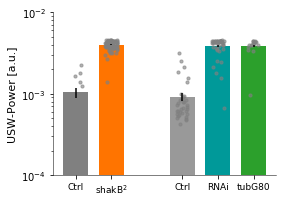

In [26]:
# Make Figure for usw-power

fig = plt.figure(figsize = (4,3))
plt.subplots_adjust(wspace=0.5)
w=0.7

ax = fig.add_subplot(111)


for i in range(len(usw_power_Ctrl_shakB2)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,usw_power_Ctrl_shakB2[i], s=10, color='0.5', alpha=0.6, zorder = 2)
#for i in range(len(usw_power_shakB2)):
#    ax.scatter(1 + np.random.random(1) * w/2 - w/4,usw_power_shakB2[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(usw_power_shakB2_GC6f_ALL)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,usw_power_shakB2_GC6f_ALL[i], s=10, color='0.5', alpha=0.6, zorder = 2)    
for i in range(len(usw_power_Ctrl_shakB_RNAi)):
    ax.scatter(3 + np.random.random(1) * w/2 - w/4,usw_power_Ctrl_shakB_RNAi[i], s=10, color='0.5', alpha=0.6, zorder = 2)       
for i in range(len(usw_power_shakB_RNAi)):
    ax.scatter(4 + np.random.random(1) * w/2 - w/4,usw_power_shakB_RNAi[i], s=10, color='0.5', alpha=0.6, zorder = 2)             
for i in range(len(usw_power_shakB_RNAi_tubG80)):
    ax.scatter(5 + np.random.random(1) * w/2 - w/4,usw_power_shakB_RNAi_tubG80[i], s=10, color='0.5', alpha=0.6, zorder = 2)

ax.bar(0,height=[np.mean(usw_power_Ctrl_shakB2)],width=w,color='0.5',yerr=[stats.sem(usw_power_Ctrl_shakB2)], log='true')
#ax.bar(1,height=[np.mean(usw_power_shakB2)],width=w,color='#FF7400',yerr=[stats.sem(usw_power_shakB2)])
ax.bar(1,height=[np.mean(usw_power_shakB2_GC6f_ALL)],width=w,color='#FF7400',yerr=[stats.sem(usw_power_shakB2_GC6f_ALL)],log='true')
ax.bar(3,height=[np.mean(usw_power_Ctrl_shakB_RNAi)],width=w,color='0.6',yerr=[stats.sem(usw_power_Ctrl_shakB_RNAi)], log='true')
ax.bar(4,height=[np.mean(usw_power_shakB_RNAi)],width=w,color='#009999',yerr=[stats.sem(usw_power_shakB_RNAi)], log='true')
ax.bar(5,height=[np.mean(usw_power_shakB_RNAi_tubG80)],width=w,color='C2',yerr=[stats.sem(usw_power_shakB_RNAi)], log='true')
ax.axhline(y=0, color='0.4', linewidth='1')



ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('USW-Power [a.u.]', size=11)
ax.set_xticks([0,1,3,4,5])
ax.set_xticklabels(('Ctrl','shakB$^2$','Ctrl','RNAi','tubG80'), size=9)
plt.ylim([0.0001,0.01])
plt.yscale('log')

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)

plt.savefig('USW_power_Imaging_barplot.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [10]:
stats.ttest_ind(usw_power_Ctrl_shakB2, usw_power_shakB2, axis=0, equal_var=False)

Ttest_indResult(statistic=-9.99727278259011, pvalue=5.804711309584147e-11)

In [11]:
stats.ttest_ind(usw_power_Ctrl_shakB_RNAi, usw_power_shakB_RNAi, axis=0, equal_var=False)

Ttest_indResult(statistic=-17.838575141247812, pvalue=2.452447119402799e-29)

In [12]:
freq_max_shakB2 = np.absolute(freqs[idx][np.argmax(ps_shakB2_osci[idx], axis=0)])
freq_max_shakB_RNAi = np.absolute(freqs[idx][np.argmax(ps_shakB_RNAi_osci[idx], axis=0)])
freq_max_shakB_RNAi_tubG80 = np.absolute(freqs[idx][np.argmax(shakB_RNAi_tubG80[idx], axis=0)])
freq_max_shakB2_GC6f_ALL = np.absolute(freqs[idx][np.argmax(ps_shakB2_GC6f_ALL_osci[idx], axis=0)])

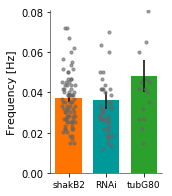

In [13]:
# Make Figure for Osci.Freq, Error bars are std

fig = plt.figure(figsize = (2,3))
plt.subplots_adjust(wspace=0.5)
ax = fig.add_subplot(111)
w=0.7

#ax.bar(0,height=[np.mean(freq_max_shakB2)],width=w,color='#FF7400',yerr=[stats.sem(freq_max_shakB2)])
ax.bar(0,height=[np.mean(freq_max_shakB2_GC6f_ALL)],width=w,color='#FF7400',yerr=[stats.sem(freq_max_shakB2_GC6f_ALL)])
ax.bar(1,height=[np.mean(freq_max_shakB_RNAi)],width=w,color='#009999',yerr=[stats.sem(freq_max_shakB_RNAi)])
ax.bar(2,height=[np.mean(freq_max_shakB_RNAi_tubG80)],width=w,color='C2',yerr=[stats.sem(freq_max_shakB_RNAi_tubG80)])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#for i in range(len(freq_max_shakB2)):
#    ax.scatter(0 + np.random.random(1) * w/2 - w/4,freq_max_shakB2[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB2_GC6f_ALL)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_GC6f_ALL[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB_RNAi)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,freq_max_shakB_RNAi[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB_RNAi_tubG80)):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4,freq_max_shakB_RNAi_tubG80[i], s=10, color='0.4', alpha=0.6, zorder = 2)   

#ax.set_title('Max. Osci. Frequency', size=12)
plt.ylim([0,0.081])
ax.set_xticks([0,1,2])
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xticklabels(('shakB2','RNAi','tubG80'), size=9)
ax.set_ylabel('Frequency [Hz]', size=11)
plt.savefig('Osci_Freq_barplot_all.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [14]:
print ('MeanMax_USW_shakB2_GC6f_ALL= ' + str(np.mean(freq_max_shakB2_GC6f_ALL)))
print ('MeanMax_USW_shakB2_GC6f_ALL_sem= ' + str(stats.sem(freq_max_shakB2_GC6f_ALL)))
print ('MeanMax_USW_shakB_RNAi= ' + str(np.mean(freq_max_shakB_RNAi)))
print ('MeanMax_USW_shakB_RNAi= ' + str(stats.sem(freq_max_shakB_RNAi)))
print ('MeanMax_USW_shakB_RNAi_tubG80= ' + str(np.mean(freq_max_shakB_RNAi_tubG80)))
print ('MeanMax_USW_shakB_RNAi_tubG80= ' + str(stats.sem(freq_max_shakB_RNAi_tubG80)))

MeanMax_USW_shakB2_GC6f_ALL= 0.037389139892905
MeanMax_USW_shakB2_GC6f_ALL_sem= 0.0020819086916462983
MeanMax_USW_shakB_RNAi= 0.03596333844295805
MeanMax_USW_shakB_RNAi= 0.00423989543305174
MeanMax_USW_shakB_RNAi_tubG80= 0.04820212339743596
MeanMax_USW_shakB_RNAi_tubG80= 0.007869640335711917
